In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [11]:
location = "datasets/DC_Properties.csv"
df = pd.read_csv('DC_Properties.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [13]:
df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,...,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,79478.000000,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,...,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,45887.077707,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,...,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,39739.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,119217.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,...,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


In [14]:
df['WARD'].unique()

array(['Ward 2', 'Ward 1', 'Ward 6', 'Ward 5', 'Ward 3', 'Ward 4',
       'Ward 7', 'Ward 8', nan], dtype=object)

In [18]:
newdf = df.copy()
newdf.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [19]:
newdf.drop(['Unnamed: 0', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE',
       'QUALIFIED', 'SALE_NUM', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y'], axis=1, inplace=True)

newdf.head()

,BATHRM,BEDRM,PRICE,GBA,KITCHENS,FIREPLACES,QUADRANT
0,4,4,1095000.0,2522.0,2.0,5,NW
1,3,5,NaN,2567.0,2.0,4,NW
2,3,5,2100000.0,2522.0,2.0,4,NW
3,3,5,1602000.0,2484.0,2.0,3,NW
4,2,3,NaN,5255.0,1.0,0,NW


In [20]:
newdf.describe()

,BATHRM,BEDRM,PRICE,GBA,KITCHENS,FIREPLACES
count,158957.000000,158957.000000,9.821600e+04,106696.000000,106695.000000,158957.000000
mean,1.810678,2.732506,9.313516e+05,1714.539889,1.219251,2.374674
std,0.976396,1.358864,7.061325e+06,880.677860,0.621170,737.295595
min,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,1.000000,2.000000,2.400000e+05,1190.000000,1.000000,0.000000
50%,2.000000,3.000000,3.999990e+05,1480.000000,1.000000,0.000000
75%,2.000000,3.000000,6.520000e+05,1966.000000,1.000000,1.000000
max,14.000000,24.000000,1.374275e+08,45384.000000,44.000000,293920.000000


In [21]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 7 columns):
BATHRM        158957 non-null int64
BEDRM         158957 non-null int64
PRICE         98216 non-null float64
GBA           106696 non-null float64
KITCHENS      106695 non-null float64
FIREPLACES    158957 non-null int64
QUADRANT      158720 non-null object
dtypes: float64(3), int64(3), object(1)
memory usage: 8.5+ MB


In [22]:
newdf.shape

(158957, 7)

In [23]:
newdf.isnull().sum()

BATHRM            0
BEDRM             0
PRICE         60741
GBA           52261
KITCHENS      52262
FIREPLACES        0
QUADRANT        237
dtype: int64

In [24]:
#clean outliers: pregnancy

q1 = newdf['PRICE'].quantile(.25)
q3 = newdf['PRICE'].quantile(.75)
iqr = q3-q1
toprange_price = q3 + iqr * 1.5
botrange_price = q1 - iqr * 1.5

print(toprange_price)
print(botrange_price)

1270000.0
-378000.0


In [25]:
#clean outliers: pregnancy

q1 = newdf['GBA'].quantile(.25)
q3 = newdf['GBA'].quantile(.75)
iqr = q3-q1
toprange_gba = q3 + iqr * 1.5
botrange_gba = q1 - iqr * 1.5

print(toprange_gba)
print(botrange_gba)

3130.0
26.0


In [26]:
#clean outliers: pregnancy

q1 = newdf['FIREPLACES'].quantile(.25)
q3 = newdf['FIREPLACES'].quantile(.75)
iqr = q3-q1
toprange_fire = q3 + iqr * 1.5
botrange_fire = q1 - iqr * 1.5

print(toprange_fire)
print(botrange_fire)

2.5
-1.5


In [27]:
newdf['KITCHENS'].unique()

array([ 2.,  1.,  3.,  4.,  5.,  0.,  6., 44., nan])

In [28]:
newdf['KITCHENS'].value_counts()

1.0     90434
2.0     11904
4.0      3051
3.0      1173
0.0       117
5.0        11
6.0         4
44.0        1
Name: KITCHENS, dtype: int64

In [29]:
cleandf = newdf.copy()

In [30]:
cleandf = cleandf.drop(cleandf[cleandf['PRICE'] > toprange_price].index)
cleandf = cleandf.drop(cleandf[cleandf['PRICE'] < botrange_price].index)

cleandf = cleandf.drop(cleandf[cleandf['GBA'] > toprange_gba].index)
cleandf = cleandf.drop(cleandf[cleandf['GBA'] < botrange_gba].index)

cleandf = cleandf.drop(cleandf[cleandf['FIREPLACES'] > toprange_fire].index)
cleandf = cleandf.drop(cleandf[cleandf['FIREPLACES'] < botrange_fire].index)

cleandf.head()

,BATHRM,BEDRM,PRICE,GBA,KITCHENS,FIREPLACES,QUADRANT
6,1,2,NaN,1260.0,2.0,0,NW
7,3,4,1050000.0,2401.0,2.0,1,NW
9,1,2,NaN,1590.0,1.0,0,NW
10,3,5,NaN,2748.0,3.0,0,NW
11,5,6,NaN,3100.0,3.0,0,NW


In [31]:
#WHAT IS THIS??
pd.options.display.float_format='{0:,.2f}'.format
cleandf.describe()

,BATHRM,BEDRM,PRICE,GBA,KITCHENS,FIREPLACES
count,"147,094.00","147,094.00","89,968.00","96,365.00","96,364.00","147,094.00"
mean,1.68,2.60,"428,452.72","1,531.68",1.18,0.37
std,0.81,1.22,"260,889.14",506.89,0.53,0.59
min,0.00,0.00,1.00,180.00,0.00,0.00
25%,1.00,2.00,"229,000.00","1,160.00",1.00,0.00
50%,1.00,3.00,"379,000.00","1,420.00",1.00,0.00
75%,2.00,3.00,"589,900.00","1,784.00",1.00,1.00
max,13.00,12.00,"1,270,000.00","3,130.00",5.00,2.00


In [32]:
cleandf.isnull().sum()

BATHRM            0
BEDRM             0
PRICE         57126
GBA           50729
KITCHENS      50730
FIREPLACES        0
QUADRANT        213
dtype: int64

In [33]:
#fill with mean?
cleandf['PRICE'].fillna(cleandf['PRICE'].mean(), inplace=True)

In [34]:
cleandf['GBA'].fillna(cleandf['GBA'].mean(), inplace=True)

In [35]:
cleandf['KITCHENS'].fillna(cleandf['KITCHENS'].mean(), inplace=True)

In [36]:
cleandf.isnull().sum()

BATHRM          0
BEDRM           0
PRICE           0
GBA             0
KITCHENS        0
FIREPLACES      0
QUADRANT      213
dtype: int64

In [37]:
nomissingdf = cleandf.dropna()
nomissingdf.isnull().sum()

BATHRM        0
BEDRM         0
PRICE         0
GBA           0
KITCHENS      0
FIREPLACES    0
QUADRANT      0
dtype: int64

In [38]:
nomissingdf.dtypes

BATHRM          int64
BEDRM           int64
PRICE         float64
GBA           float64
KITCHENS      float64
FIREPLACES      int64
QUADRANT       object
dtype: object

In [55]:
nomissingdf = pd.get_dummies(data = nomissingdf)

In [56]:
nomissingdf.head()

,BATHRM,BEDRM,PRICE,GBA,KITCHENS,FIREPLACES,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW
6,1,2,"428,452.72","1,260.00",2.00,0,0,1,0,0
7,3,4,"1,050,000.00","2,401.00",2.00,1,0,1,0,0
9,1,2,"428,452.72","1,590.00",1.00,0,0,1,0,0
10,3,5,"428,452.72","2,748.00",3.00,0,0,1,0,0
11,5,6,"428,452.72","3,100.00",3.00,0,0,1,0,0


In [57]:
nomissingdf.shape

(146881, 10)

In [58]:
nomissingdf.corr()

,BATHRM,BEDRM,PRICE,GBA,KITCHENS,FIREPLACES,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW
BATHRM,1.00,0.58,0.36,0.52,0.40,0.29,-0.02,0.06,-0.04,-0.04
BEDRM,0.58,1.00,0.24,0.36,0.20,0.28,0.14,-0.13,0.06,-0.10
PRICE,0.36,0.24,1.00,0.22,0.03,0.27,-0.09,0.21,-0.14,-0.06
GBA,0.52,0.36,0.22,1.00,0.36,0.33,-0.19,0.27,-0.13,-0.02
KITCHENS,0.40,0.20,0.03,0.36,1.00,-0.04,-0.01,-0.00,0.00,0.02
FIREPLACES,0.29,0.28,0.27,0.33,-0.04,1.00,-0.08,0.15,-0.08,-0.08
QUADRANT_NE,-0.02,0.14,-0.09,-0.19,-0.01,-0.08,1.00,-0.63,-0.27,-0.10
QUADRANT_NW,0.06,-0.13,0.21,0.27,-0.00,0.15,-0.63,1.00,-0.51,-0.18
QUADRANT_SE,-0.04,0.06,-0.14,-0.13,0.00,-0.08,-0.27,-0.51,1.00,-0.08
QUADRANT_SW,-0.04,-0.10,-0.06,-0.02,0.02,-0.08,-0.10,-0.18,-0.08,1.00


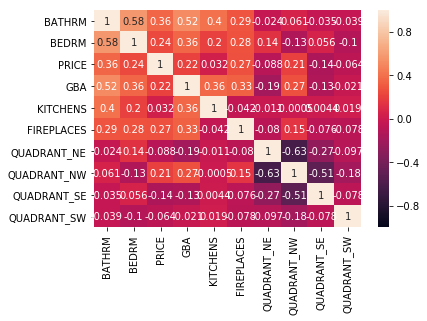

In [59]:
corr = nomissingdf.corr()
sns.heatmap(corr, vmin=-1, annot=True)

In [60]:
import statsmodels.formula.api as smf

In [62]:
result = smf.ols('PRICE ~ BATHRM + BEDRM + GBA + KITCHENS + FIREPLACES + QUADRANT_NE + QUADRANT_NW + QUADRANT_SE + QUADRANT_SW', data=nomissingdf).fit()

In [63]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     4517.
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:21:25   Log-Likelihood:            -1.9881e+06
No. Observations:              146881   AIC:                         3.976e+06
Df Residuals:                  146872   BIC:                         3.976e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     2.39e+05   1712.058    139.606      0.000    2.36e+05    2.42e+05
BATHRM       8.024e+04    823.942     97.391      0.000    7.86e+04    8.19e+04
BEDRM        1.207e+04    506.177     23.841      0.000    1.11e+04    1.31e+04
GBA           -16.7790      1.509    -11.120      0.000     -19.736     -13.822
KITCHENS    -4.361e+04   1267.414    -34.408      0.000   -4.61e+04   -4.11e+04
FIREPLACES   4.623e+04    904.751     51.098      0.000    4.45e+04     4.8e+04
QUADRANT_NE   5.24e+04   1076.432     48.675      0.000    5.03e+04    5.45e+04
QUADRANT_NW  1.178e+05    993.988    118.502      0.000    1.16e+05     1.2e+05
QUADRANT_SE  2.577e+04   1165.609     22.107      0.000    2.35e+04    2.81e+04
QUADRANT_SW  4.306e+04   2377.843     18.109      0.000    3.84e+04    4.77e+04
==============================================================================
Omnibus:                    14228.249   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24736.296
Skew:                           0.686   Prob(JB):                         0.00
Kurtosis:                       4.470   Cond. No.                     1.34e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.07e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
result = smf.ols('PRICE ~ BATHRM + BEDRM + GBA + KITCHENS + FIREPLACES', data=nomissingdf).fit()

In [65]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     5845.
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:21:34   Log-Likelihood:            -1.9909e+06
No. Observations:              146881   AIC:                         3.982e+06
Df Residuals:                  146875   BIC:                         3.982e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.993e+05   2084.946    143.550      0.000    2.95e+05    3.03e+05
BATHRM      8.294e+04    838.820     98.881      0.000    8.13e+04    8.46e+04
BEDRM       3196.8738    494.350      6.467      0.000    2227.958    4165.789
GBA           14.2991      1.469      9.733      0.000      11.420      17.178
KITCHENS   -5.102e+04   1288.061    -39.613      0.000   -5.35e+04   -4.85e+04
FIREPLACES  5.299e+04    917.104     57.784      0.000    5.12e+04    5.48e+04
==============================================================================
Omnibus:                    13875.763   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23933.201
Skew:                           0.675   Prob(JB):                         0.00
Kurtosis:                       4.446   Cond. No.                     7.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
X = nomissingdf.drop(['PRICE'], axis=1)
Y = nomissingdf["PRICE"]

In [67]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, random_state = 5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(110160, 9)
(36721, 9)
(110160,)
(36721,)


In [69]:
lm.fit(X_train, Y_train)
lm.score(X_train, Y_train)

0.1959731597536325

In [70]:
pred_test = lm.predict(X_test)
lm.score(X_test, Y_test)

0.20176349161490936

In [71]:
print ('Fit a model X_train, and calculate MSE with Y_train:', np.mean((Y_train - lm.predict(X_train)) ** 2))

print ('Fit a model X_test, and calculate MSE with Y_test:', np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 33458008457.88327
Fit a model X_test, and calculate MSE with Y_test: 33364679037.27334


From the linear regression that was run on the data, and the machine learning it appears that the variables we have chosen or the way in which we cleaned those variables, does not allow for clear predictions of outcomes.

In [72]:
df['STYLE'].unique()

array(['3 Story', '4 Story', '2 Story', '2.5 Story Fin', '3.5 Story Fin',
       '1 Story', '1.5 Story Fin', '2.5 Story Unfin', '3.5 Story Unfin',
       'Default', '1.5 Story Unfin', '4.5 Story Fin', 'Split Level',
       'Bi-Level', 'Split Foyer', 'Vacant', 'Outbuildings',
       '4.5 Story Unfin', nan], dtype=object)

In [73]:
df['AC'].unique()

array(['Y', 'N', '0'], dtype=object)

In [116]:
newdf2 = df.copy()
newdf2.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.00,8,4,"1,910.00","1,988.00",...,-77.04,Old City 2,040 D Old City 2,"4,201.00",004201 2006,Ward 2,152,-77.04,38.91,NW
1,1,3,1,Warm Cool,Y,2.00,11,5,"1,898.00","2,007.00",...,-77.04,Old City 2,040 D Old City 2,"4,201.00",004201 2006,Ward 2,152,-77.04,38.91,NW
2,2,3,1,Hot Water Rad,Y,2.00,9,5,"1,910.00","2,009.00",...,-77.04,Old City 2,040 D Old City 2,"4,201.00",004201 2006,Ward 2,152,-77.04,38.91,NW
3,3,3,1,Hot Water Rad,Y,2.00,8,5,"1,900.00","2,003.00",...,-77.04,Old City 2,040 D Old City 2,"4,201.00",004201 2006,Ward 2,152,-77.04,38.91,NW
4,4,2,1,Warm Cool,Y,1.00,11,3,"1,913.00","2,012.00",...,-77.04,Old City 2,040 D Old City 2,"4,201.00",004201 2006,Ward 2,152,-77.04,38.91,NW


In [117]:
newdf2.drop(['Unnamed: 0', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE',
       'QUALIFIED', 'SALE_NUM', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'SQUARE','QUADRANT', 'X', 'Y',], axis=1, inplace=True)

newdf2.head()

,BATHRM,BEDRM,PRICE,GBA,KITCHENS,FIREPLACES,WARD
0,4,4,"1,095,000.00","2,522.00",2.00,5,Ward 2
1,3,5,nan,"2,567.00",2.00,4,Ward 2
2,3,5,"2,100,000.00","2,522.00",2.00,4,Ward 2
3,3,5,"1,602,000.00","2,484.00",2.00,3,Ward 2
4,2,3,nan,"5,255.00",1.00,0,Ward 2


In [118]:
newdf2.isnull().sum()

BATHRM            0
BEDRM             0
PRICE         60741
GBA           52261
KITCHENS      52262
FIREPLACES        0
WARD              1
dtype: int64

In [119]:
q1 = newdf['PRICE'].quantile(.25)
q3 = newdf['PRICE'].quantile(.75)
iqr = q3-q1
toprange_price = q3 + iqr * 1.5
botrange_price = q1 - iqr * 1.5

print(toprange_price)
print(botrange_price)

1270000.0
-378000.0


In [120]:
q1 = newdf['GBA'].quantile(.25)
q3 = newdf['GBA'].quantile(.75)
iqr = q3-q1
toprange_gba = q3 + iqr * 1.5
botrange_gba = q1 - iqr * 1.5

print(toprange_gba)
print(botrange_gba)

3130.0
26.0


In [121]:
q1 = newdf['FIREPLACES'].quantile(.25)
q3 = newdf['FIREPLACES'].quantile(.75)
iqr = q3-q1
toprange_fire = q3 + iqr * 1.5
botrange_fire = q1 - iqr * 1.5

print(toprange_fire)
print(botrange_fire)

2.5
-1.5


In [122]:
cleandf = newdf2.copy()

In [123]:
cleandf = cleandf.drop(cleandf[cleandf['PRICE'] > toprange_price].index)
cleandf = cleandf.drop(cleandf[cleandf['PRICE'] < botrange_price].index)

cleandf = cleandf.drop(cleandf[cleandf['GBA'] > toprange_gba].index)
cleandf = cleandf.drop(cleandf[cleandf['GBA'] < botrange_gba].index)

cleandf = cleandf.drop(cleandf[cleandf['FIREPLACES'] > toprange_fire].index)
cleandf = cleandf.drop(cleandf[cleandf['FIREPLACES'] < botrange_fire].index)

cleandf.head()

,BATHRM,BEDRM,PRICE,GBA,KITCHENS,FIREPLACES,WARD
6,1,2,nan,"1,260.00",2.00,0,Ward 2
7,3,4,"1,050,000.00","2,401.00",2.00,1,Ward 2
9,1,2,nan,"1,590.00",1.00,0,Ward 2
10,3,5,nan,"2,748.00",3.00,0,Ward 2
11,5,6,nan,"3,100.00",3.00,0,Ward 2


In [124]:
pd.options.display.float_format='{0:,.2f}'.format
cleandf.describe()

,BATHRM,BEDRM,PRICE,GBA,KITCHENS,FIREPLACES
count,"147,094.00","147,094.00","89,968.00","96,365.00","96,364.00","147,094.00"
mean,1.68,2.60,"428,452.72","1,531.68",1.18,0.37
std,0.81,1.22,"260,889.14",506.89,0.53,0.59
min,0.00,0.00,1.00,180.00,0.00,0.00
25%,1.00,2.00,"229,000.00","1,160.00",1.00,0.00
50%,1.00,3.00,"379,000.00","1,420.00",1.00,0.00
75%,2.00,3.00,"589,900.00","1,784.00",1.00,1.00
max,13.00,12.00,"1,270,000.00","3,130.00",5.00,2.00


In [125]:
cleandf.isnull().sum()

BATHRM            0
BEDRM             0
PRICE         57126
GBA           50729
KITCHENS      50730
FIREPLACES        0
WARD              1
dtype: int64

In [126]:
cleandf['PRICE'].fillna(cleandf['PRICE'].mean(), inplace=True)

In [127]:
cleandf['GBA'].fillna(cleandf['GBA'].mean(), inplace=True)

In [128]:
cleandf['KITCHENS'].fillna(cleandf['KITCHENS'].mean(), inplace=True)

In [129]:
cleandf.isnull().sum()

BATHRM        0
BEDRM         0
PRICE         0
GBA           0
KITCHENS      0
FIREPLACES    0
WARD          1
dtype: int64

In [130]:
nomissingdf = cleandf.dropna()
nomissingdf.isnull().sum()

BATHRM        0
BEDRM         0
PRICE         0
GBA           0
KITCHENS      0
FIREPLACES    0
WARD          0
dtype: int64

In [131]:
nomissingdf.dtypes

BATHRM          int64
BEDRM           int64
PRICE         float64
GBA           float64
KITCHENS      float64
FIREPLACES      int64
WARD           object
dtype: object

In [132]:
nomissingdf = pd.get_dummies(data = nomissingdf)

In [133]:
nomissingdf.head()

,BATHRM,BEDRM,PRICE,GBA,KITCHENS,FIREPLACES,WARD_Ward 1,WARD_Ward 2,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8
6,1,2,"428,452.72","1,260.00",2.00,0,0,1,0,0,0,0,0,0
7,3,4,"1,050,000.00","2,401.00",2.00,1,0,1,0,0,0,0,0,0
9,1,2,"428,452.72","1,590.00",1.00,0,0,1,0,0,0,0,0,0
10,3,5,"428,452.72","2,748.00",3.00,0,0,1,0,0,0,0,0,0
11,5,6,"428,452.72","3,100.00",3.00,0,0,1,0,0,0,0,0,0


In [134]:
nomissingdf.describe()

,BATHRM,BEDRM,PRICE,GBA,KITCHENS,FIREPLACES,WARD_Ward 1,WARD_Ward 2,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8
count,"147,093.00","147,093.00","147,093.00","147,093.00","147,093.00","147,093.00","147,093.00","147,093.00","147,093.00","147,093.00","147,093.00","147,093.00","147,093.00","147,093.00"
mean,1.68,2.60,"428,452.72","1,531.67",1.18,0.37,0.11,0.13,0.13,0.14,0.14,0.15,0.11,0.07
std,0.81,1.22,"204,034.26",410.27,0.43,0.59,0.32,0.34,0.34,0.35,0.35,0.36,0.32,0.26
min,0.00,0.00,1.00,180.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,"323,900.00","1,296.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,3.00,"428,452.72","1,531.68",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2.00,3.00,"439,100.00","1,573.00",1.18,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,13.00,12.00,"1,270,000.00","3,130.00",5.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [135]:
nomissingdf.corr()

,BATHRM,BEDRM,PRICE,GBA,KITCHENS,FIREPLACES,WARD_Ward 1,WARD_Ward 2,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8
BATHRM,1.00,0.58,0.36,0.52,0.40,0.29,0.00,-0.10,0.08,0.09,0.02,0.00,-0.07,-0.02
BEDRM,0.58,1.00,0.24,0.36,0.20,0.28,-0.05,-0.33,-0.03,0.22,0.14,-0.05,0.05,0.05
PRICE,0.36,0.24,1.00,0.22,0.03,0.27,0.06,0.07,0.12,0.03,-0.05,0.08,-0.20,-0.17
GBA,0.52,0.36,0.22,1.00,0.36,0.33,0.06,0.03,0.18,0.08,-0.06,-0.02,-0.21,-0.09
KITCHENS,0.40,0.20,0.03,0.36,1.00,-0.04,0.05,0.03,-0.04,-0.08,0.01,0.07,-0.05,0.02
FIREPLACES,0.29,0.28,0.27,0.33,-0.04,1.00,-0.04,-0.01,0.15,0.14,-0.05,0.00,-0.10,-0.14
WARD_Ward 1,0.00,-0.05,0.06,0.06,0.05,-0.04,1.00,-0.14,-0.14,-0.15,-0.14,-0.15,-0.13,-0.10
WARD_Ward 2,-0.10,-0.33,0.07,0.03,0.03,-0.01,-0.14,1.00,-0.15,-0.16,-0.16,-0.17,-0.14,-0.11
WARD_Ward 3,0.08,-0.03,0.12,0.18,-0.04,0.15,-0.14,-0.15,1.00,-0.16,-0.16,-0.17,-0.14,-0.11
WARD_Ward 4,0.09,0.22,0.03,0.08,-0.08,0.14,-0.15,-0.16,-0.16,1.00,-0.17,-0.17,-0.15,-0.11


In [136]:
cleanup= nomissingdf.copy()

In [137]:
cleanup.describe()

,BATHRM,BEDRM,PRICE,GBA,KITCHENS,FIREPLACES,WARD_Ward 1,WARD_Ward 2,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8
count,"147,093.00","147,093.00","147,093.00","147,093.00","147,093.00","147,093.00","147,093.00","147,093.00","147,093.00","147,093.00","147,093.00","147,093.00","147,093.00","147,093.00"
mean,1.68,2.60,"428,452.72","1,531.67",1.18,0.37,0.11,0.13,0.13,0.14,0.14,0.15,0.11,0.07
std,0.81,1.22,"204,034.26",410.27,0.43,0.59,0.32,0.34,0.34,0.35,0.35,0.36,0.32,0.26
min,0.00,0.00,1.00,180.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,"323,900.00","1,296.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,3.00,"428,452.72","1,531.68",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2.00,3.00,"439,100.00","1,573.00",1.18,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,13.00,12.00,"1,270,000.00","3,130.00",5.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


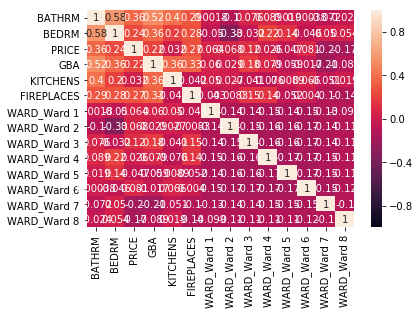

In [141]:
corr = nomissingdf.corr()
sns.heatmap(corr, vmin=-1,annot=True)

In [329]:
nomissingdf.rename(columns={'WARD_Ward 1': 'WOne',"WARD_Ward 2":'WTwo','WARD_Ward 3':'WThree','WARD_Ward 4':'WFour','WARD_Ward 5':'WFive','WARD_Ward 6':'WSix','WARD_Ward 7':'WSeve','WARD_Ward 8':'WEight'}, inplace = True)

In [330]:
result = smf.ols('PRICE ~ BATHRM + BEDRM + GBA + KITCHENS + FIREPLACES + WOne + WTwo+ WThree+ WFour+ WFive+ WSix', data=nomissingdf).fit()

In [331]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     4486.
Date:                Mon, 15 Jul 2019   Prob (F-statistic):               0.00
Time:                        12:58:02   Log-Likelihood:            -1.9858e+06
No. Observations:              147093   AIC:                         3.972e+06
Df Residuals:                  147081   BIC:                         3.972e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.135e+05   2117.812    100.792      0.000    2.09e+05    2.18e+05
BATHRM      7.617e+04    796.240     95.665      0.000    7.46e+04    7.77e+04
BEDRM       2.951e+04    527.156     55.979      0.000    2.85e+04    3.05e+04
GBA          -33.4264      1.457    -22.949      0.000     -36.281     -30.572
KITCHENS   -5.458e+04   1235.466    -44.176      0.000    -5.7e+04   -5.22e+04
FIREPLACES  3.638e+04    884.860     41.116      0.000    3.46e+04    3.81e+04
WOne        1.618e+05   1796.984     90.065      0.000    1.58e+05    1.65e+05
WTwo        1.983e+05   1840.627    107.736      0.000    1.95e+05    2.02e+05
WThree      1.615e+05   1792.224     90.103      0.000    1.58e+05    1.65e+05
WFour        8.36e+04   1677.776     49.829      0.000    8.03e+04    8.69e+04
WFive       7.467e+04   1634.320     45.689      0.000    7.15e+04    7.79e+04
WSix        1.579e+05   1632.144     96.747      0.000    1.55e+05    1.61e+05
==============================================================================
Omnibus:                    12060.172   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21046.656
Skew:                           0.599   Prob(JB):                         0.00
Kurtosis:                       4.413   Cond. No.                     1.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [332]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [333]:

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, random_state = 5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(110160, 9)
(36721, 9)
(110160,)
(36721,)


In [334]:
lm.fit(X_train, Y_train)
lm.score(X_train, Y_train)

0.1959731597536325

In [335]:
pred_test = lm.predict(X_test)
lm.score(X_test, Y_test)

0.20176349161490936

In [336]:
print ('Fit a model X_train, and calculate MSE with Y_train:', np.mean((Y_train - lm.predict(X_train)) ** 2))

print ('Fit a model X_test, and calculate MSE with Y_test:', np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 33458008457.88327
Fit a model X_test, and calculate MSE with Y_test: 33364679037.27334


Still not so good...... Ill keep trying to add different variables and try and get a better fit. 

In [156]:
df['ASSESSMENT_NBHD'].unique()

array(['Old City 2', 'Foggy Bottom', 'Central-tri 1', 'Old City 1',
       'Southwest Waterfront', 'Capitol Hill', 'Georgetown',
       'Glover Park', 'Burleith', 'Palisades', 'Berkley', 'Foxhall',
       'Kent', 'Wesley Heights', 'American University', 'Spring Valley',
       'Chevy Chase', 'North Cleveland Park', 'Wakefield',
       'Cleveland Park', 'Observatory Circle', 'Forest Hills',
       'Massachusetts Avenue Heights', 'Woodley', 'Takoma Park',
       'Rock Creek Park', 'Kalorama', 'Garfield', 'Hawthorne',
       'Mt. Pleasant', 'Crestwood', 'Columbia Heights',
       '16th Street Heights', 'Brightwood', 'Shepherd Heights',
       'Colonial Village', 'Petworth', 'Ledroit Park', 'Eckington',
       'Chillum', 'Brookland', 'Riggs Park', 'Brentwood', 'Trinidad',
       'Woodridge', 'Michigan Park', 'Fort Lincoln', 'Lily Ponds',
       'Deanwood', 'Marshall Heights', 'Fort Dupont Park', 'Hillcrest',
       'Anacostia', 'Randle Heights', 'Barry Farms', 'Congress Heights',
       na

In [ ]:
df['ASSESSMENT_NBHD'].unique()

In [157]:
df['SALEDATE'].unique()

array(['2003-11-25 00:00:00', '2000-08-17 00:00:00',
       '2016-06-21 00:00:00', ..., '1995-02-16 00:00:00',
       '1994-02-14 00:00:00', '1993-08-06 00:00:00'], dtype=object)

In [158]:
df['CENSUS_TRACT'].unique()

array([ 4201.,  5201.,  4300., 10800.,  5500.,  4202.,  5301.,  5600.,
        4400., 10700.,  5001.,  5002.,  4801.,  4802.,  4901.,  4702.,
        6400.,  4902., 10200.,  4600.,  4701.,  7200.,  8200.,  6500.,
        7000.,  8301., 11000., 10600.,  8302.,  6600.,  8100.,  8410.,
        8402.,  6700.,  6900.,  8001.,  8002.,  7100.,  6802.,  6801.,
         202.,   100.,  6804.,   300.,   702.,   802.,   801.,   902.,
         901.,  1001.,  1100.,  1002.,  1200.,   701.,   600.,  1500.,
        1302.,  1401.,   400.,  1402.,  1301.,   502.,  9505.,  4100.,
        4001.,   501.,  2701.,  3800.,  4002.,  2702.,  2600.,  3900.,
        2801.,  2502.,  2501.,  3700.,  2802.,  2001.,  1804.,  1803.,
        1600.,  2002.,  2900.,  3000.,  3100.,  3600.,  3500.,  1901.,
        2101.,  2201., 10300.,  2400.,  1702.,  3200.,  3400.,  3302.,
        3301.,  2102.,  2301.,  2202.,  1902.,  8701.,  9203.,  9501.,
        9204.,  9201.,  8702.,  9508.,  9507.,  9509.,  9504.,  9302.,
      

In [159]:
df['GRADE'].unique()

array(['Very Good', 'Above Average', 'Good Quality', 'Excellent',
       'Average', 'Superior', 'Fair Quality', 'Exceptional-D',
       'Exceptional-C', 'Low Quality', 'Exceptional-A', 'Exceptional-B',
       'No Data', nan], dtype=object)

In [205]:
df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,"158,957.00","158,957.00","158,957.00","106,696.00","158,957.00","158,957.00","158,686.00","80,928.00","158,957.00","106,652.00",...,"158,957.00","158,957.00","52,261.00","52,261.00","158,956.00","158,956.00","158,956.00","158,956.00","158,720.00","158,720.00"
mean,"79,478.00",1.81,0.46,1.20,6.19,2.73,"1,941.99","1,998.24","1,963.72",2.09,...,14.25,"2,473.28","2,371.54",888.83,"20,012.69",38.91,-77.02,"5,348.22",-77.02,38.91
std,"45,887.08",0.98,0.59,0.60,2.62,1.36,33.64,16.58,24.92,2.93,...,3.73,"5,059.05","1,114.27",420.19,15.63,0.03,0.04,"3,369.65",0.04,0.03
min,0.00,0.00,0.00,0.00,0.00,0.00,"1,754.00",20.00,"1,800.00",0.00,...,11.00,0.00,"1,001.00",0.00,"20,001.00",38.82,-77.11,100.00,-77.11,38.82
25%,"39,739.00",1.00,0.00,1.00,4.00,2.00,"1,918.00","1,985.00","1,954.00",2.00,...,11.00,697.00,"1,501.00",616.00,"20,007.00",38.90,-77.04,"2,102.00",-77.04,38.90
50%,"79,478.00",2.00,0.00,1.00,6.00,3.00,"1,937.00","2,004.00","1,963.00",2.00,...,13.00,"1,649.00","2,265.00",783.00,"20,011.00",38.92,-77.02,"5,201.00",-77.02,38.92
75%,"119,217.00",2.00,1.00,1.00,7.00,3.00,"1,960.00","2,010.00","1,975.00",2.00,...,17.00,"3,000.00","2,910.00","1,060.00","20,018.00",38.94,-76.99,"8,302.00",-76.99,38.94
max,"158,956.00",14.00,11.00,6.00,48.00,24.00,"2,019.00","2,019.00","2,018.00",826.00,...,117.00,"942,632.00","5,621.00","8,553.00","20,392.00",39.00,-76.91,"11,100.00",-76.91,38.99


In [261]:
newdf3 = df.copy()
newdf3.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.00,8,4,"1,910.00","1,988.00",...,-77.04,Old City 2,040 D Old City 2,"4,201.00",004201 2006,Ward 2,152,-77.04,38.91,NW
1,1,3,1,Warm Cool,Y,2.00,11,5,"1,898.00","2,007.00",...,-77.04,Old City 2,040 D Old City 2,"4,201.00",004201 2006,Ward 2,152,-77.04,38.91,NW
2,2,3,1,Hot Water Rad,Y,2.00,9,5,"1,910.00","2,009.00",...,-77.04,Old City 2,040 D Old City 2,"4,201.00",004201 2006,Ward 2,152,-77.04,38.91,NW
3,3,3,1,Hot Water Rad,Y,2.00,8,5,"1,900.00","2,003.00",...,-77.04,Old City 2,040 D Old City 2,"4,201.00",004201 2006,Ward 2,152,-77.04,38.91,NW
4,4,2,1,Warm Cool,Y,1.00,11,3,"1,913.00","2,012.00",...,-77.04,Old City 2,040 D Old City 2,"4,201.00",004201 2006,Ward 2,152,-77.04,38.91,NW


In [262]:
newdf3.drop(['Unnamed: 0', 'HF_BATHRM', 'NUM_UNITS',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE',
       'QUALIFIED', 'SALE_NUM', 'BLDG_NUM', 'STYLE', 'STRUCT',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y','BATHRM','GBA', 'KITCHENS','QUADRANT', 'FIREPLACES',], axis=1, inplace=True)

In [263]:
newdf3.head(10)

,HEAT,AC,ROOMS,BEDRM,PRICE,GRADE
0,Warm Cool,Y,8,4,"1,095,000.00",Very Good
1,Warm Cool,Y,11,5,nan,Very Good
2,Hot Water Rad,Y,9,5,"2,100,000.00",Very Good
3,Hot Water Rad,Y,8,5,"1,602,000.00",Very Good
4,Warm Cool,Y,11,3,nan,Very Good
5,Hot Water Rad,Y,10,5,"1,950,000.00",Very Good
6,Warm Cool,Y,5,2,nan,Above Average
7,Hot Water Rad,Y,8,4,"1,050,000.00",Very Good
8,Warm Cool,Y,7,3,"1,430,000.00",Above Average
9,Hot Water Rad,Y,6,2,nan,Good Quality


In [264]:
newdf3.isnull().sum()

HEAT         0
AC           0
ROOMS        0
BEDRM        0
PRICE    60741
GRADE    52261
dtype: int64

In [265]:
q1 = newdf3['PRICE'].quantile(.25)
q3 = newdf3['PRICE'].quantile(.75)
iqr = q3-q1
toprange_price = q3 + iqr * 1.5
botrange_price = q1 - iqr * 1.5

print(toprange_price)
print(botrange_price)

1270000.0
-378000.0


In [266]:
newdf3['PRICE'].fillna(newdf3['PRICE'].mean(), inplace=True)

In [267]:
newdf3.head(10)

,HEAT,AC,ROOMS,BEDRM,PRICE,GRADE
0,Warm Cool,Y,8,4,"1,095,000.00",Very Good
1,Warm Cool,Y,11,5,"931,351.59",Very Good
2,Hot Water Rad,Y,9,5,"2,100,000.00",Very Good
3,Hot Water Rad,Y,8,5,"1,602,000.00",Very Good
4,Warm Cool,Y,11,3,"931,351.59",Very Good
5,Hot Water Rad,Y,10,5,"1,950,000.00",Very Good
6,Warm Cool,Y,5,2,"931,351.59",Above Average
7,Hot Water Rad,Y,8,4,"1,050,000.00",Very Good
8,Warm Cool,Y,7,3,"1,430,000.00",Above Average
9,Hot Water Rad,Y,6,2,"931,351.59",Good Quality


In [ ]:
#'Very Good', 'Above Average', 'Good Quality', 'Excellent',
      # 'Average', 'Superior', 'Fair Quality', 'Exceptional-D',
     #  'Exceptional-C', 'Low Quality', 'Exceptional-A', 'Exceptional-B',
      # 'No Data', nan], dtype=object)

In [284]:
df['AC'].unique()

array(['Y', 'N', '0'], dtype=object)

In [285]:
dfclean = newdf3.copy()
dfclean.head()

,HEAT,AC,ROOMS,BEDRM,PRICE,GRADE
0,Warm Cool,Y,8,4,"1,095,000.00",Very Good
1,Warm Cool,Y,11,5,"931,351.59",Very Good
2,Hot Water Rad,Y,9,5,"2,100,000.00",Very Good
3,Hot Water Rad,Y,8,5,"1,602,000.00",Very Good
4,Warm Cool,Y,11,3,"931,351.59",Very Good


In [286]:
df_no_missing = df.dropna()
df_no_missing

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT


In [316]:
dfclean = pd.get_dummies(data = newdf3)

In [317]:
dfclean.head()

,ROOMS,BEDRM,PRICE,HEAT_Air Exchng,HEAT_Air-Oil,HEAT_Elec Base Brd,HEAT_Electric Rad,HEAT_Evp Cool,HEAT_Forced Air,HEAT_Gravity Furnac,...,GRADE_Exceptional-A,GRADE_Exceptional-B,GRADE_Exceptional-C,GRADE_Exceptional-D,GRADE_Fair Quality,GRADE_Good Quality,GRADE_Low Quality,GRADE_No Data,GRADE_Superior,GRADE_Very Good
0,8,4,"1,095,000.00",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,11,5,"931,351.59",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9,5,"2,100,000.00",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,8,5,"1,602,000.00",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,11,3,"931,351.59",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [287]:
df.fillna(0)

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.00,8,4,"1,910.00","1,988.00",...,-77.04,Old City 2,040 D Old City 2,"4,201.00",004201 2006,Ward 2,152,-77.04,38.91,NW
1,1,3,1,Warm Cool,Y,2.00,11,5,"1,898.00","2,007.00",...,-77.04,Old City 2,040 D Old City 2,"4,201.00",004201 2006,Ward 2,152,-77.04,38.91,NW
2,2,3,1,Hot Water Rad,Y,2.00,9,5,"1,910.00","2,009.00",...,-77.04,Old City 2,040 D Old City 2,"4,201.00",004201 2006,Ward 2,152,-77.04,38.91,NW
3,3,3,1,Hot Water Rad,Y,2.00,8,5,"1,900.00","2,003.00",...,-77.04,Old City 2,040 D Old City 2,"4,201.00",004201 2006,Ward 2,152,-77.04,38.91,NW
4,4,2,1,Warm Cool,Y,1.00,11,3,"1,913.00","2,012.00",...,-77.04,Old City 2,040 D Old City 2,"4,201.00",004201 2006,Ward 2,152,-77.04,38.91,NW
5,5,3,2,Hot Water Rad,Y,1.00,10,5,"1,913.00",0.00,...,-77.04,Old City 2,040 D Old City 2,"4,201.00",004201 2006,Ward 2,152,-77.04,38.91,NW
6,6,1,0,Warm Cool,Y,2.00,5,2,"1,917.00","1,988.00",...,-77.04,Old City 2,040 D Old City 2,"4,201.00",004201 2005,Ward 2,152,-77.04,38.91,NW
7,7,3,1,Hot Water Rad,Y,2.00,8,4,"1,906.00","2,011.00",...,-77.04,Old City 2,040 D Old City 2,"4,201.00",004201 2005,Ward 2,152,-77.04,38.91,NW
8,8,3,1,Warm Cool,Y,2.00,7,3,"1,908.00","2,008.00",...,-77.04,Old City 2,040 D Old City 2,"4,201.00",004201 2005,Ward 2,152,-77.04,38.91,NW
9,9,1,1,Hot Water Rad,Y,1.00,6,2,"1,908.00","1,979.00",...,-77.04,Old City 2,040 D Old City 2,"4,201.00",004201 2005,Ward 2,152,-77.04,38.91,NW


In [ ]:
#'Very Good', 'Above Average', 'Good Quality', 'Excellent',
      # 'Average', 'Superior', 'Fair Quality', 'Exceptional-D',
     #  'Exceptional-C', 'Low Quality', 'Exceptional-A', 'Exceptional-B',
      # 'No Data', nan], dtype=object)

In [299]:
def score_to_numeric(x):
    if x=='Y':
        return 1
    if x=='N':
        return 2
    if x=='0':
        return 3
    if x=='Very Good':
        return 1
    if x=='Above Average':
        return 2
    if x== 'Good Quality':
        return 3
    if x== 'Avereage':
        return 5
    if x== ' Superior':
        return 6
    if x=='Fair Quality':
        return 7
    if x== 'Exceptional-D':
        return 8
    if x== 'Exceptional-C':
        return 9
    if x == 'Low Quality': 
        return 10
    if x=='Exceptional-A':
        return 11
    if x== 'Exceptional-B':
        return 12
    
    if x=='Hot Water Rad':
        return 1
    if x=='Warm Cool':
        return 2
    if x=='Forced Air':
        return 3
    if x=='Ht Pump':
        return 4
    if x== 'Electric Rad':
        return 5
    if x== 'Elec Base Brd':
        return 6
    if x== ' Wall Furnace':
        return 7
    if x=='Water Base Brd':
        return 8
    if x== 'Evp Cool':
        return 9
    if x== 'Air Exchng':
        return 10
    if x == 'No Data': 
        return 11
    if x=='Ind Unit':
        return 12
    if x== 'Gravity Furnac':
        return 13
    if x== 'Air-Oil':
        return 14
    
   
    
dfclean['ACValue'] = dfclean['AC'].apply(score_to_numeric)
dfclean['GRADEValue']= dfclean['GRADE'].apply(score_to_numeric)
dfclean['HEATValue']= dfclean['HEAT'].apply(score_to_numeric)
dfclean.tail(5)

,HEAT,AC,ROOMS,BEDRM,PRICE,GRADE,ACValue,GRADEValue,HEATValue
158952,Forced Air,Y,3,1,"399,900.00",NaN,1,nan,3.00
158953,Forced Air,Y,4,2,"416,000.00",NaN,1,nan,3.00
158954,Forced Air,Y,4,2,"600,000.00",NaN,1,nan,3.00
158955,Warm Cool,Y,2,0,"215,100.00",NaN,1,nan,2.00
158956,Warm Cool,Y,2,0,"931,351.59",NaN,1,nan,2.00


In [300]:
dfclean.head(40)

,HEAT,AC,ROOMS,BEDRM,PRICE,GRADE,ACValue,GRADEValue,HEATValue
0,Warm Cool,Y,8,4,"1,095,000.00",Very Good,1,1.00,2.00
1,Warm Cool,Y,11,5,"931,351.59",Very Good,1,1.00,2.00
2,Hot Water Rad,Y,9,5,"2,100,000.00",Very Good,1,1.00,1.00
3,Hot Water Rad,Y,8,5,"1,602,000.00",Very Good,1,1.00,1.00
4,Warm Cool,Y,11,3,"931,351.59",Very Good,1,1.00,2.00
5,Hot Water Rad,Y,10,5,"1,950,000.00",Very Good,1,1.00,1.00
6,Warm Cool,Y,5,2,"931,351.59",Above Average,1,2.00,2.00
7,Hot Water Rad,Y,8,4,"1,050,000.00",Very Good,1,1.00,1.00
8,Warm Cool,Y,7,3,"1,430,000.00",Above Average,1,2.00,2.00
9,Hot Water Rad,Y,6,2,"931,351.59",Good Quality,1,3.00,1.00


In [296]:
df['HEAT'].unique()

array(['Warm Cool', 'Hot Water Rad', 'Forced Air', 'Elec Base Brd',
       'Ht Pump', 'Electric Rad', 'Wall Furnace', 'Water Base Brd',
       'Evp Cool', 'Air Exchng', 'No Data', 'Ind Unit', 'Gravity Furnac',
       'Air-Oil'], dtype=object)

In [ ]:
dfclean.head(40)

In [307]:
cleanup2= dfclean.copy()

In [308]:
cleanup2.drop(['GRADE','AC','HEAT'], axis=1, inplace=True)

cleanup2.head()

,ROOMS,BEDRM,PRICE,ACValue,GRADEValue,HEATValue
0,8,4,"1,095,000.00",1,1.00,2.00
1,11,5,"931,351.59",1,1.00,2.00
2,9,5,"2,100,000.00",1,1.00,1.00
3,8,5,"1,602,000.00",1,1.00,1.00
4,11,3,"931,351.59",1,1.00,2.00


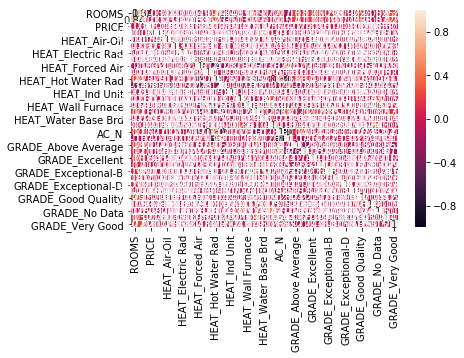

In [319]:
corr = dfclean.corr()
sns.heatmap(corr, vmin=-1,annot=True)

In [320]:
dfclean.describe()

,ROOMS,BEDRM,PRICE,HEAT_Air Exchng,HEAT_Air-Oil,HEAT_Elec Base Brd,HEAT_Electric Rad,HEAT_Evp Cool,HEAT_Forced Air,HEAT_Gravity Furnac,...,GRADE_Exceptional-A,GRADE_Exceptional-B,GRADE_Exceptional-C,GRADE_Exceptional-D,GRADE_Fair Quality,GRADE_Good Quality,GRADE_Low Quality,GRADE_No Data,GRADE_Superior,GRADE_Very Good
count,"158,957.00","158,957.00","158,957.00","158,957.00","158,957.00","158,957.00","158,957.00","158,957.00","158,957.00","158,957.00",...,"158,957.00","158,957.00","158,957.00","158,957.00","158,957.00","158,957.00","158,957.00","158,957.00","158,957.00","158,957.00"
mean,6.19,2.73,"931,351.59",0.00,0.00,0.00,0.00,0.00,0.34,0.00,...,0.01,0.00,0.00,0.00,0.00,0.13,0.00,0.00,0.02,0.06
std,2.62,1.36,"5,550,558.00",0.02,0.03,0.05,0.03,0.02,0.47,0.03,...,0.07,0.04,0.02,0.02,0.03,0.34,0.01,0.01,0.13,0.23
min,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,4.00,2.00,"339,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,6.00,3.00,"747,500.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,7.00,3.00,"931,351.59",0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,48.00,24.00,"137,427,545.00",1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [321]:
dfclean.columns

Index(['ROOMS', 'BEDRM', 'PRICE', 'HEAT_Air Exchng', 'HEAT_Air-Oil',
       'HEAT_Elec Base Brd', 'HEAT_Electric Rad', 'HEAT_Evp Cool',
       'HEAT_Forced Air', 'HEAT_Gravity Furnac', 'HEAT_Hot Water Rad',
       'HEAT_Ht Pump', 'HEAT_Ind Unit', 'HEAT_No Data', 'HEAT_Wall Furnace',
       'HEAT_Warm Cool', 'HEAT_Water Base Brd', 'AC_0', 'AC_N', 'AC_Y',
       'GRADE_Above Average', 'GRADE_Average', 'GRADE_Excellent',
       'GRADE_Exceptional-A', 'GRADE_Exceptional-B', 'GRADE_Exceptional-C',
       'GRADE_Exceptional-D', 'GRADE_Fair Quality', 'GRADE_Good Quality',
       'GRADE_Low Quality', 'GRADE_No Data', 'GRADE_Superior',
       'GRADE_Very Good'],
      dtype='object')

In [ ]:
#I give up on try three :( sorry guys! 